In [1]:
import numpy as np

In [111]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [100]:
# set configuration
sample_size = 50
nr_sample = 20
num_steps = 50
max_t = 20
t = np.linspace(max_t/num_steps, max_t, num_steps)
sample_config = [sample_size, nr_sample]

# classificatiom
n_folds = 5

### Bounded distributions

In [77]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [78]:
ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.969921,0.882977,0.748636,0.581388,0.398976,0.220256,0.062958,-0.058381,-0.134025,-0.160027,...,0.107692,0.053443,0.004177,-0.033965,-0.056652,-0.061928,-0.050416,-0.025120,0.009103,arcsine
1,0.975052,0.902955,0.791578,0.652882,0.501347,0.352097,0.218983,0.112884,0.040461,0.003530,...,-0.161791,-0.225336,-0.265051,-0.276729,-0.259931,-0.217994,-0.157497,-0.087273,-0.017132,arcsine
2,0.973461,0.896647,0.777629,0.628760,0.465185,0.303028,0.157510,0.041212,-0.037268,-0.074125,...,0.058844,0.008773,-0.030040,-0.053163,-0.058216,-0.045118,-0.016006,0.025161,0.073232,arcsine


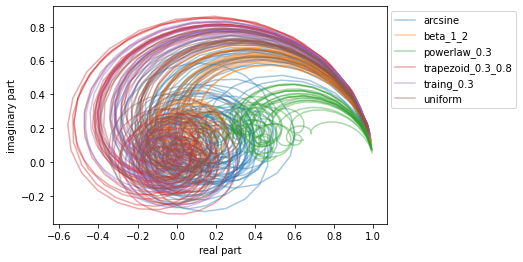

In [79]:
dem.get_ecf_plot(ecf_df,t)

### SVM

In [105]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = np.arange(1,21)
max_t_list = [50, 100, 150, 200, 250, 500]

In [118]:
res_svm = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample, n_folds, 1)

  0%|          | 0/6 [00:00<?, ?it/s]

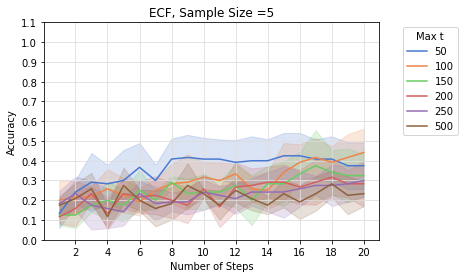

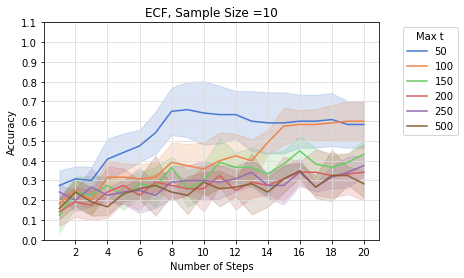

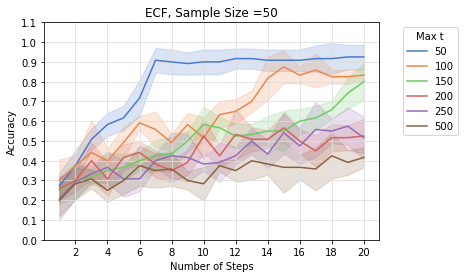

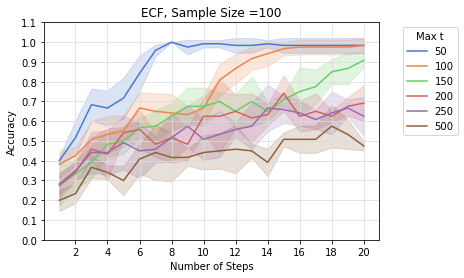

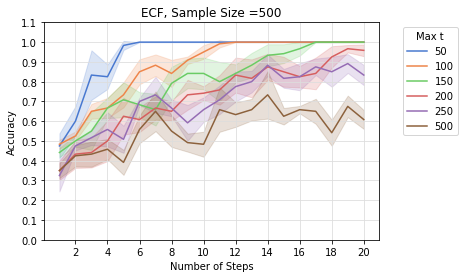

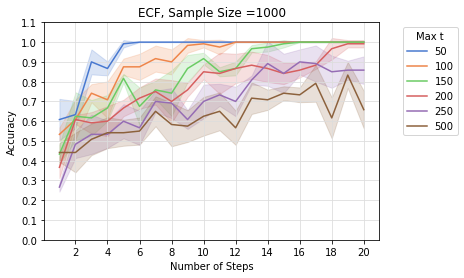

In [119]:
cm.plot_cv_ecf(res_svm)

### Logistic Regression

In [106]:
res_lr = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample, n_folds, 2)

  0%|          | 0/6 [00:00<?, ?it/s]

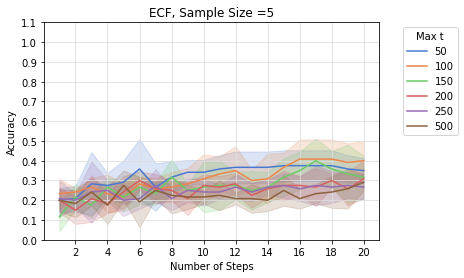

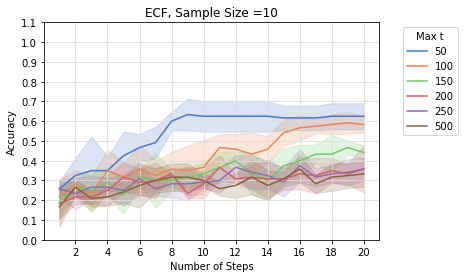

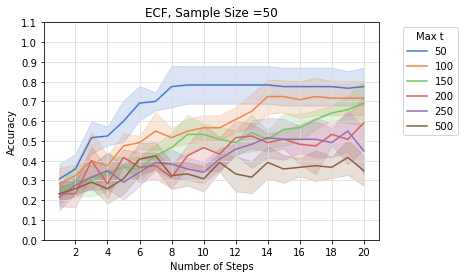

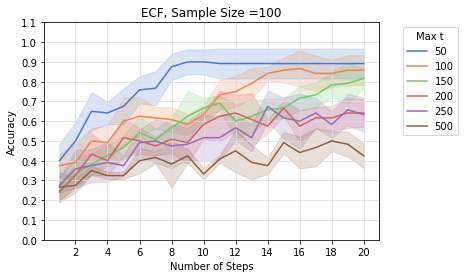

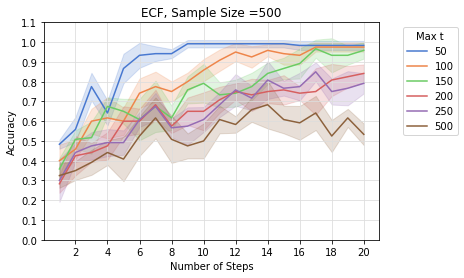

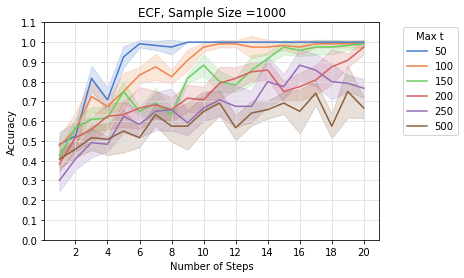

In [112]:
cm.plot_cv_ecf(res_lr)

### Heavytail distributions

In [113]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)

In [114]:
ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.918403,0.708448,0.452097,0.228853,0.077137,-0.008526,-0.051869,-0.069093,-0.063764,-0.038730,...,0.055357,0.071138,0.074801,0.070769,0.063848,0.050812,0.025892,-0.005338,-0.021650,cauchy
1,0.891165,0.678650,0.527944,0.430541,0.293911,0.141000,0.060529,0.036117,-0.023746,-0.130500,...,0.257667,0.288341,0.302092,0.275395,0.228865,0.196226,0.159622,0.098074,0.068215,cauchy
2,0.919417,0.726567,0.515895,0.340727,0.199370,0.086561,0.015990,-0.013874,-0.036711,-0.074054,...,0.132759,0.199142,0.205570,0.167364,0.123486,0.082405,0.032960,-0.013709,-0.032641,cauchy


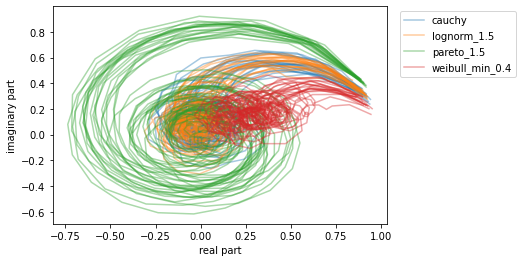

In [115]:
dem.get_ecf_plot(ecf_df, t)

### SVM

In [120]:
res_svm_ht = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 1, transform = True)

  0%|          | 0/6 [00:00<?, ?it/s]

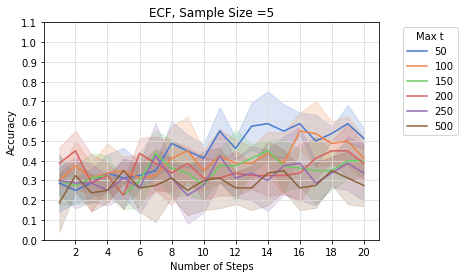

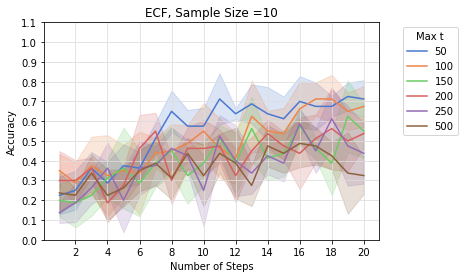

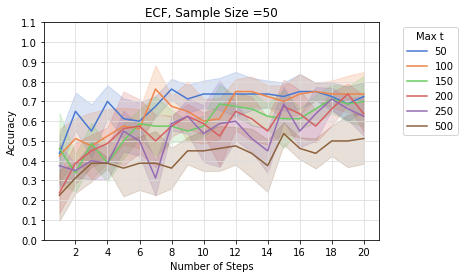

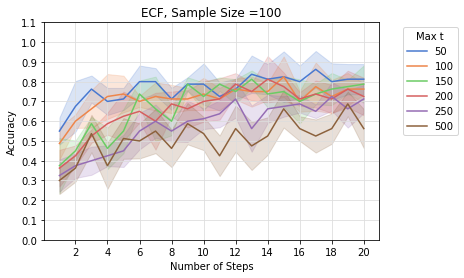

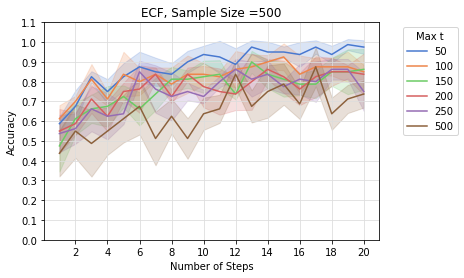

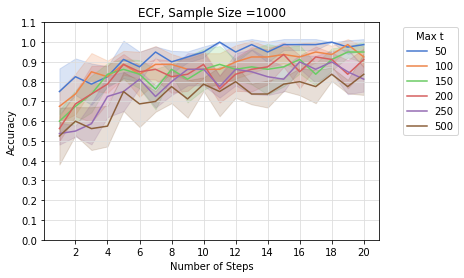

In [121]:
cm.plot_cv_ecf(res_svm_ht)

### Logistic Regression

In [116]:
res_lr_ht = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 2, transform=True)

  0%|          | 0/6 [00:00<?, ?it/s]

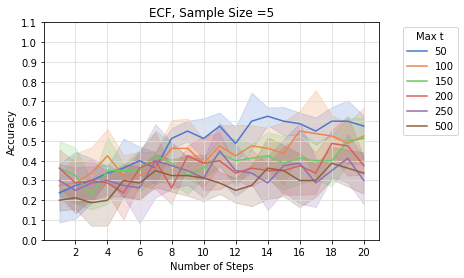

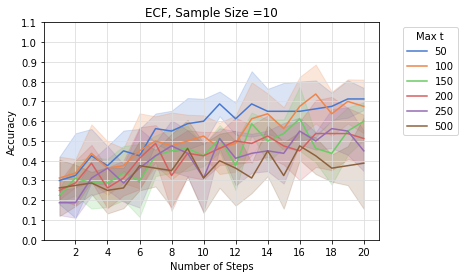

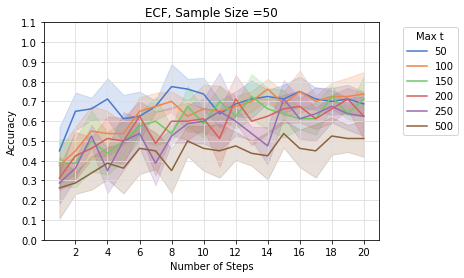

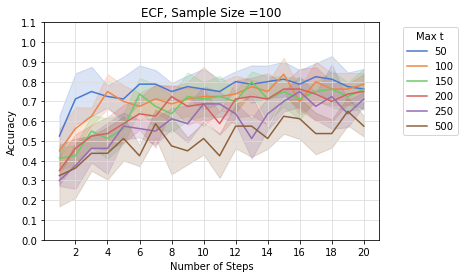

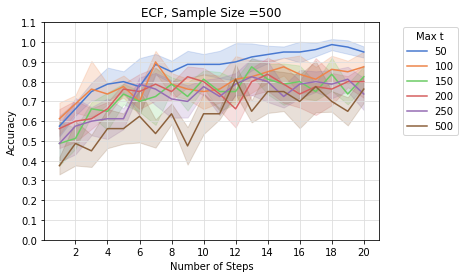

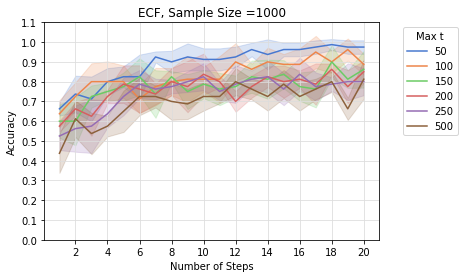

In [117]:
cm.plot_cv_ecf(res_lr_ht)